##**Rede Neural**

Iremos agora utilizar uma rede neural com a mesma base de dados utilizada no modelo de KMeans. O objetivo ainda permanece o mesmo: Tentar prever com base nas features quando uma paciente pode possuir diabetes ou não. Importante ressaltar que esse modelo, no contexto da saúde, tem como função auxiliar os profissionais a fazerem uma triagem mais eficiente dos pacientes e não tomar a decisão em si. Sendo assim, não estamos procurando uma eficácia extremamente alta, mas sim um modelo que tenha uma boa proporção de TN e TP, com menos FN do que FP.

In [ ]:
import pandas as pd
Dados = pd.read_csv('/content/drive/MyDrive/diabetesKMeans.csv')
Dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Importando a base de dados com cerca de 768 registros

In [ ]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(Dados, train_size=0.8)

Separando as partes de treino e teste (80% e 20%, respectivamente)

In [ ]:
import tensorflow
from tensorflow import keras

nn = keras.Sequential([
      keras.layers.Input(len(treino.columns)-3),
      keras.layers.Dense(4, activation='relu'),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')
nn.fit(treino[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']] , treino['Outcome'])

20/20 [==============================] - 2s 6ms/step - loss: 0.7976


- Nesse trecho de código, criamos uma rede neural com 6 entradas. Aqui é importante destacar que, com base na fase anterior do algortimo KMeans, determinamos que algumas variáveis tinham menos correlação com o diagnóstico positivo. Essas variáveis são correspondentes ao número de gestações e a idade das pacientes. Sendo assim, para esta fase nós as removemos para evitar uma poluição das predições do modelo.
- Continuando sobre a rede neural, utilizamos cerca de 4 camadas internas. Sendo que cada uma contém 4,3 e 2 nós respectivamente. A 4 camada interna já corresponde a uma saída do modelo, que possui como ativação uma função sigmóide (ou regressão logística) pois a saída do nosso modelo é binária (positivo/negativo). Criada a rede neural, compilamos e realizamos o fit para uma configuração inicial dos pesos dos neurônios.  

In [ ]:
previsoes = nn.predict(treino[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']] )
previsoes[:30]

array([[0.61879987],
       [0.5378219 ],
       [0.6438092 ],
       [0.49749428],
       [0.5370637 ],
       [0.63935566],
       [0.51923215],
       [0.68206483],
       [0.50759137],
       [0.6071004 ],
       [0.5804776 ],
       [0.63620615],
       [0.5850457 ],
       [0.5804748 ],
       [0.63199794],
       [0.620435  ],
       [0.5727382 ],
       [0.5997375 ],
       [0.6749519 ],
       [0.5863158 ],
       [0.5919171 ],
       [0.5717203 ],
       [0.54113954],
       [0.55750227],
       [0.5360463 ],
       [0.6952911 ],
       [0.64656967],
       [0.49520448],
       [0.5874371 ],
       [0.6264018 ]], dtype=float32)

In [ ]:
p_treino = []
p_treino.extend([0 if i < 0.6 else 1 for i in previsoes])
p_treino[:10]

[1, 0, 1, 0, 0, 1, 0, 1, 0, 1]

Realizando as previsões em teste, é possível determinar um valor de ativação aquivalnete a 0.6, que acreditamos ser o melhor para o nosso modelo depois de diversas análises. Sendo assim, percorremos cada elemento da saída da rede neural e aplicamos uma função de ativação usando uma list comprehension, que é um recurso do python que permite simplificar laços de repetição com condições.

In [ ]:
y_treino = treino['Outcome']
y_treino

541    1
684    0
663    1
50     0
310    0
      ..
555    0
650    0
605    0
34     0
342    0
Name: Outcome, Length: 614, dtype: int64

Realizadas as predições e transformações das saídas, obtemos também as labels originais da base de dados para fazer uma comparação e determinar a acurácia.

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_treino= accuracy_score(y_treino,p_treino)
acuracia_treino*100

65.14657980456026

65% de acurácia no nosso cenário não é o ideal, pois ainda existe uma margem de erro bem significativa do modelo. No entanto, o contexto do negócio é usar esse modelo como apenas um auxiliar, então no geral ele está cumprindo bem a sua função. Ele já se mostra significativamente mais eficiente que uma escolha de 50/50. Agora o importante é realizar o mesmo procedimento na parte separada para teste e tentar manter a mesma acurácia vista em treino, assim como verificar a proporção de acertos, FN e FP.

In [ ]:
p_teste = []
previsoes = nn.predict(teste[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']] )
p_teste.extend([0 if i < 0.6 else 1 for i in previsoes])

In [ ]:
y_teste = teste['Outcome']
y_teste

242    1
404    1
301    1
266    1
732    1
      ..
720    0
736    0
276    1
712    1
434    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste,p_teste) * 100

74.67532467532467

Os resultados em teste revelam que a acurácia (74%) aumentou cerca de 9% em relação ao treino (65%), o que é bem positivo no nosso cenário. Pela nossa análise, acreditamos que esses valores não são tão discrepantes o suficiente para caracterizar um underfit. Desse modo, é possível concluir que em teste o modelo aumentou significativamente a sua eficiência e o seu grau de confiabilidade. Como dito na introdução dessa análise, apesar de uma acurácia bem alta (acima de 80%) ser o melhor cenário, estamos trabalhando com um modelo que tem como proposta ser um auxiliar. Sendo assim, esses resultados são bem aceitáveis. Essa rede neural já tornaria o atendimento de uma clínica mais eficiente, poupando tempo, recursos, medicamentos e dinheiro. Ou seja, ele cumpre bem a sua função.

[[70 25]
 [14 45]]


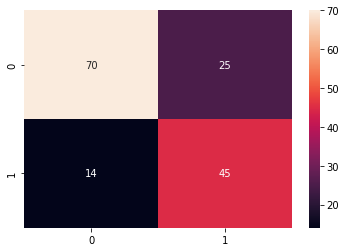

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_teste , p_teste)
print(cm)
sns.heatmap(cm, annot=True)

Como podemos observar na matriz de confusão, a proporção de acertos é muito boa, tanto de negativos quanto de positivos. Algo a se notar também é a menor quantidade de FP do que FN, que no contexto da saúde é o ideal. Isso mostra que pacientes mais propensos a terem diabetes tendem a ser diagnosticados mais corretamente pelo modelo, enquanto aqueles que receberam um falso positivo irão passar por mais uma triagem.

In [ ]:
print(classification_report(y_teste,p_teste))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        95
           1       0.64      0.76      0.70        59

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.75       154



Aqui vemos que o modelo tem mais precisão em diagnosticar negativos do que positivos, com uma precisão de 83% e um recall de 0.74. Enquanto os diagnósticos negativos apresentam uma precisão de 64%, mas com um recall mais alto de 74%, o que é bom dado os objetivos do modelo.

###**Conclusão**

Após a implementação do modelo e as análises, podemos concluir que dado o nosso objetivo de negócio, o modelo consegue ter um desempenho bem aceitavel. Certamente não é o cenário ideal, ainda mais se tratando da saúde. No entanto, por ser um auxiliar de clínica geral, ele consegue filtrar com uma boa eficiência aqueles pacientes que necessitam de mais prioridade. Como dito antes, essas identificações de prioridade ajudam muito na gestão de recursos de um clínica/hospital, e podem fazer muita diferença em questões não só do tratamento adequado aos pacientes, como também na administração daquele lugar.